In [117]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt

def getImage(image):
    path = '/Users/alexandrasmith/Desktop/Digital Image Processing 793/Assignment 2/'
    im = cv2.imread(path + image, cv2.IMREAD_GRAYSCALE)
    return im.astype(np.double)

def smoothen(image, kernel_dim):
    # create averaging box filter
    kernel = (1/(kernel_dim*kernel_dim))*np.ones((kernel_dim, kernel_dim), dtype = int)
    blur = cv2.filter2D(image, -1, kernel)
    return blur.astype(np.uint8)

def sharpen(image, kernel_dim):
    L = np.ones((kernel_dim, kernel_dim), dtype = int)
    # location of centre pixel
    c = int(np.ceil(kernel_dim/2) - 1)
    L[c][c] = -(kernel_dim**2 - 1)
    kernel = (1/(kernel_dim*kernel_dim))*L
    mask = cv2.filter2D(image, -1, kernel)
    # c = -1
    sharp = image - mask
    return sharp

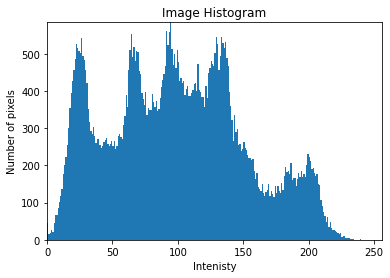

In [108]:
ims = ['lenna256.jpg', 'choir.jpg', 'city_left.bmp', 'city_right.bmp', 'chest_xray.tif']
image = getImage(ims[0])
name = ims[0]

plt.hist(image.ravel(), 256, [0, 256])
plt.xlabel('Intenisty')
plt.ylabel('Number of pixels')
plt.margins(x=0)
plt.margins(y=0)
plt.title('Image Histogram')
plt.show()

In [140]:
i3 = smoothen(image, 3)
i5 = smoothen(image, 5)
i7 = smoothen(image, 7)
i11 = smoothen(image, 11)

j3 = sharpen(image, 3)
j5 = sharpen(image, 5)
j7 = sharpen(image, 7)
j11 = sharpen(image, 11)

# clip values into range (0, 255)
j3 = np.clip(j3, 0, 255)
j5 = np.clip(j5, 0, 255)
j7 = np.clip(j7, 0, 255)
j11 = np.clip(j11, 0, 255)

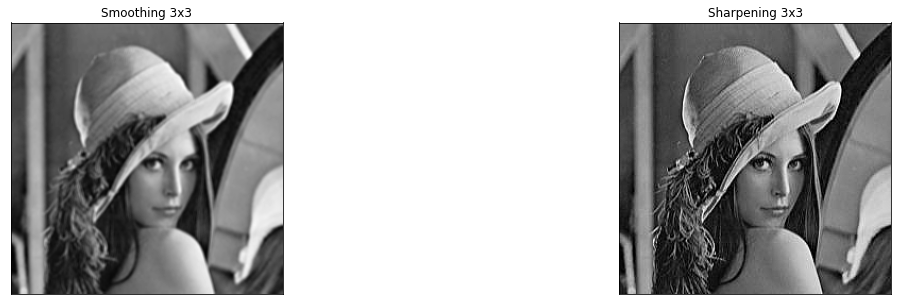

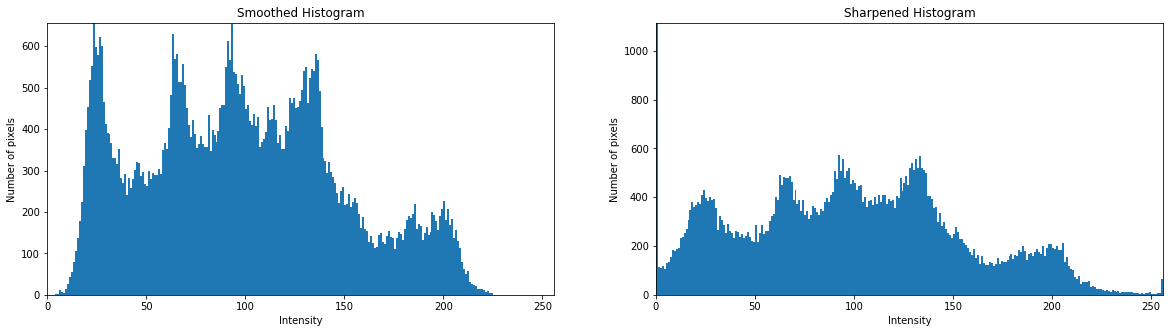

In [131]:
# Question 1a
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
ax[0].set_title('Smoothing 3x3')
ax[0].imshow(i3, cmap="gray")
ax[1].set_title('Sharpening 3x3')
ax[1].imshow(j3, cmap="gray")

# plot histograms
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
ax[0].hist(i3.ravel(), 256, [0, 256])
ax[0].set_xlabel('Intensity')
ax[0].set_ylabel('Number of pixels')
ax[0].margins(x=0)
ax[0].margins(y=0)
ax[0].set_title('Smoothed Histogram')
ax[1].hist(j3.ravel(), 256, [0, 256])
ax[1].set_xlabel('Intensity')
ax[1].set_ylabel('Number of pixels')
ax[1].margins(x=0)
ax[1].margins(y=0)
ax[1].set_title('Sharpened Histogram');

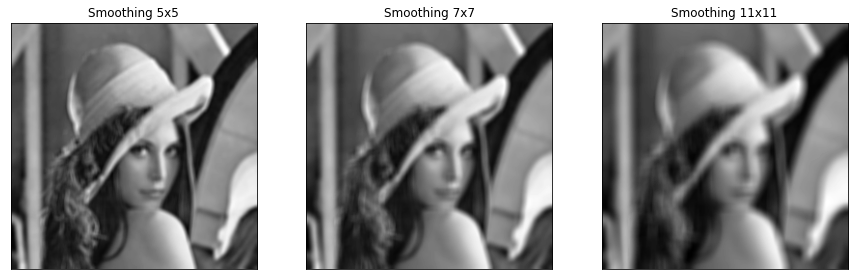

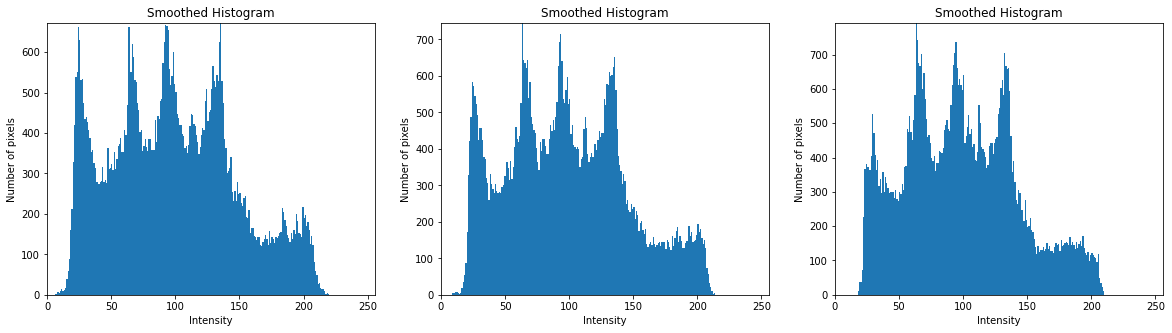

In [141]:
# Question 1b
# smoothing
fig, ax = plt.subplots(1, 3, figsize = (15, 15))
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
ax[0].set_title('Smoothing 5x5')
ax[0].imshow(i5, cmap="gray")
ax[1].set_title('Smoothing 7x7')
ax[1].imshow(i7, cmap="gray")
ax[2].set_title('Smoothing 11x11')
ax[2].imshow(i11, cmap="gray")

# plot histograms
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
ax[0].hist(i5.ravel(), 256, [0, 256])
ax[0].set_xlabel('Intensity')
ax[0].set_ylabel('Number of pixels')
ax[0].margins(x=0)
ax[0].margins(y=0)
ax[0].set_title('Smoothed Histogram')
ax[1].hist(i7.ravel(), 256, [0, 256])
ax[1].set_xlabel('Intensity')
ax[1].set_ylabel('Number of pixels')
ax[1].margins(x=0)
ax[1].margins(y=0)
ax[1].set_title('Smoothed Histogram')
ax[2].hist(i11.ravel(), 256, [0, 256])
ax[2].set_xlabel('Intensity')
ax[2].set_ylabel('Number of pixels')
ax[2].margins(x=0)
ax[2].margins(y=0)
ax[2].set_title('Smoothed Histogram');

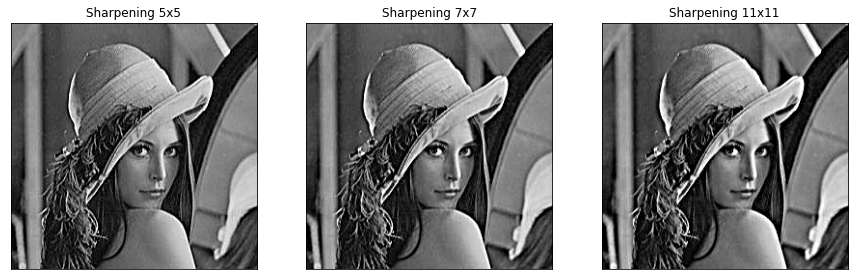

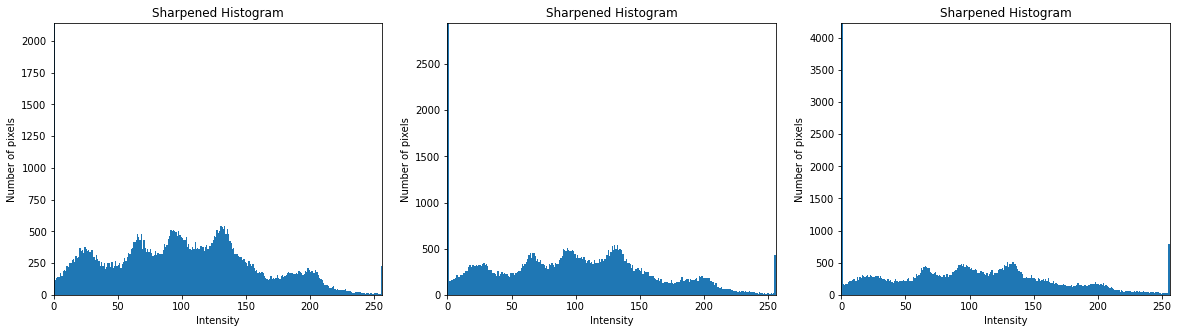

In [143]:
# sharpening
fig, ax = plt.subplots(1, 3, figsize = (15, 15))
plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
ax[0].set_title('Sharpening 5x5')
ax[0].imshow(j5, cmap="gray")
ax[1].set_title('Sharpening 7x7')
ax[1].imshow(j7, cmap="gray")
ax[2].set_title('Sharpening 11x11')
ax[2].imshow(j11, cmap="gray")

# plot histograms
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
ax[0].hist(j5.ravel(), 256, [0, 256])
ax[0].set_xlabel('Intensity')
ax[0].set_ylabel('Number of pixels')
ax[0].margins(x=0)
ax[0].margins(y=0)
ax[0].set_title('Sharpened Histogram')
ax[1].hist(j7.ravel(), 256, [0, 256])
ax[1].set_xlabel('Intensity')
ax[1].set_ylabel('Number of pixels')
ax[1].margins(x=0)
ax[1].margins(y=0)
ax[1].set_title('Sharpened Histogram')
ax[2].hist(j11.ravel(), 256, [0, 256])
ax[2].set_xlabel('Intensity')
ax[2].set_ylabel('Number of pixels')
ax[2].margins(x=0)
ax[2].margins(y=0)
ax[2].set_title('Sharpened Histogram');

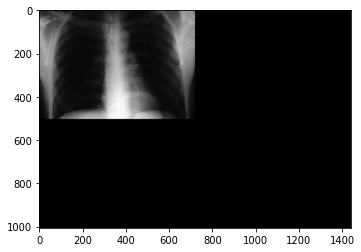

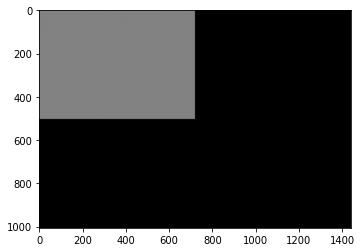

<ipython-input-195-7162b91c2b78>:23: ComplexWarning: Casting complex values to real discards the imaginary part
  spectrum = np.array(c*np.log(1 + np.abs(shift)), dtype=np.uint8)


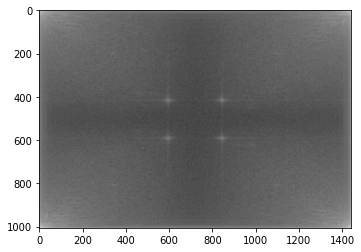

TypeError: slice indices must be integers or None or have an __index__ method

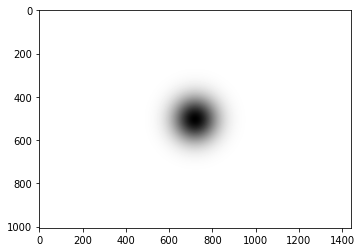

In [195]:
# Question 4
image = getImage(ims[4])
r, c = image.shape
# Gaussian high pass filter function
P, Q = 2*r, 2*c
# pad image (use zero-padding)
im = cv2.copyMakeBorder(image, 0, P-r, 0, Q-c, cv2.BORDER_CONSTANT, value = 0)
plt.imshow(im, cmap="gray")
plt.show()
# center Fourier transform - done with shift function?
for i in range(P):
    for j in range(Q):
        im[i][j] = im[i][j]*((-1)**(i + j))
plt.imshow(im.astype(np.uint8), cmap="gray");
plt.show()

# compute DFT
F = np.fft.fft2(im)
# display purposes
shift = np.fft.fftshift(F)
Y = np.log(1 + shift)
c = 255/np.max(Y)
spectrum = np.array(c*np.log(1 + np.abs(shift)), dtype=np.uint8)
plt.imshow(spectrum, cmap="gray")
plt.show()

# Filter transfer function, D_0 = 70
D0 = 70
H = np.zeros((P, Q))
for u in range(P):
    for v in range(Q):
        D = np.sqrt((u - P/2)**2 + (v - Q/2)**2)
        H[u][v] =  1 - np.exp((-D**2)/(2*(D0**2)))
plt.imshow(H, cmap="gray")

# form product elementwise
G = np.multiply(H, F)
g = np.real(np.fft.ifft2(G))
for i in range(P):
    for j in range(Q):
        g[i][j] = g[i][j]*(-1)**(i + j)

# obtain final result of same size of original image
hpf = g[0:r, 0:c]
plt.imshow(hpf, cmap="gray")
plt.show()

# High frequency emphasis filtering

# Histogram equalisation
# eq = cv2.equalizeHist(image)

# median filter?